# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_excel(r"D:\DATA SCIENCE ASSIGNMENTS\Data Science Assignments\Decision Tree\Decision Tree\heart_disease.xlsx",sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
median = df['oldpeak'].median()

In [8]:
df = df.fillna(median)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [10]:
df['fbs'] = df['fbs'].astype(int)

In [11]:
df.describe()

,age,trestbps,chol,fbs,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,0.203744,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,0.403003,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,0.000000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,0.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,4.000000


In [12]:
df['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [13]:
numerical_cols = [fe for fe in df.columns if df[fe].dtype not in ['object','bool']]

In [14]:
categorical_cols = [fe for fe in df.columns if df[fe].dtype in ['object','bool']]

In [15]:
numerical_cols

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num']

In [16]:
categorical_cols

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [17]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [18]:
df['exang'] = df['exang'].replace('TURE',True)
df['exang'] = df['exang'].replace('FALSE',False)

In [19]:
df['exang'].unique()

array([False,  True])

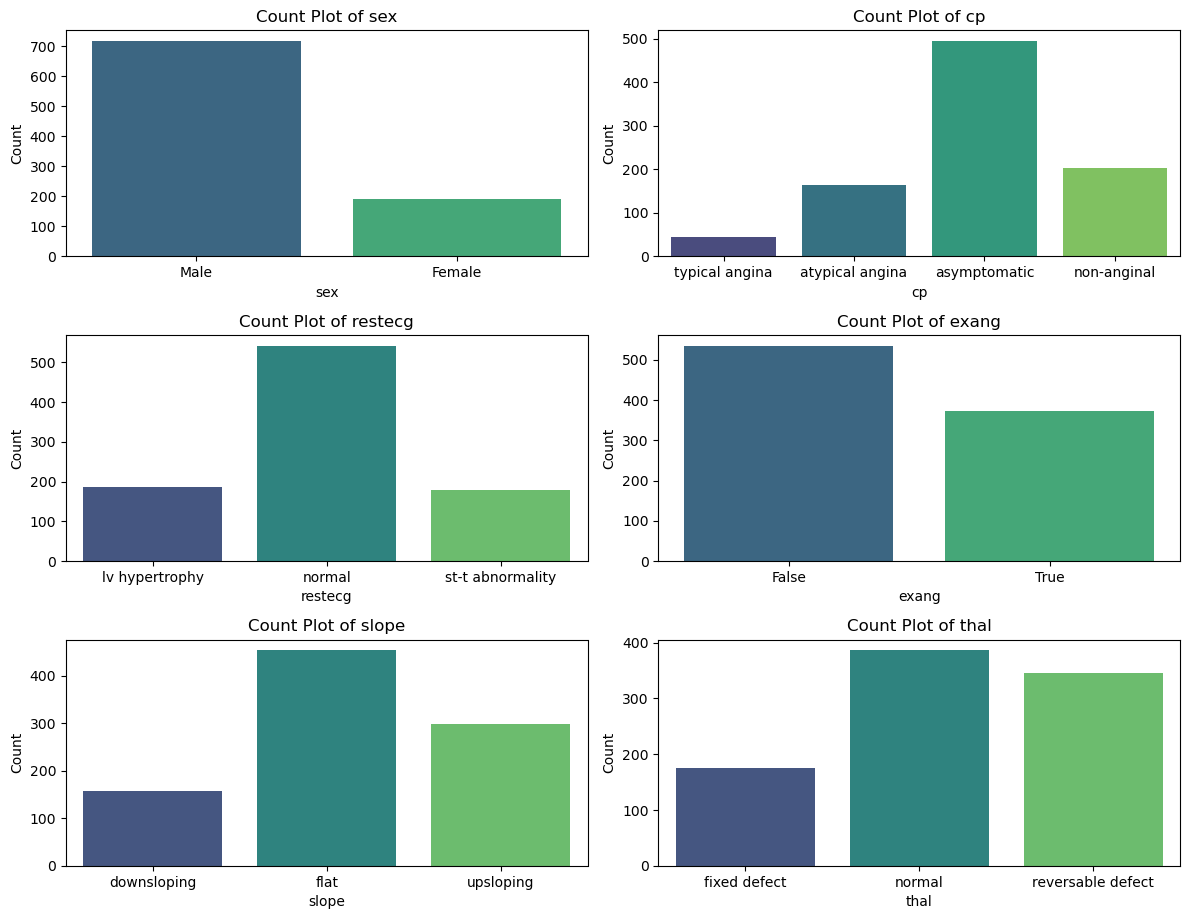

In [20]:
plt.figure(figsize=(12,len(categorical_cols)*3))
for i,fe in enumerate(categorical_cols,1):
    plt.subplot(len(categorical_cols),2,i)
    sns.countplot(data=df, x=fe, palette='viridis')  # Define the palette
    plt.title(f'Count Plot of {fe}')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

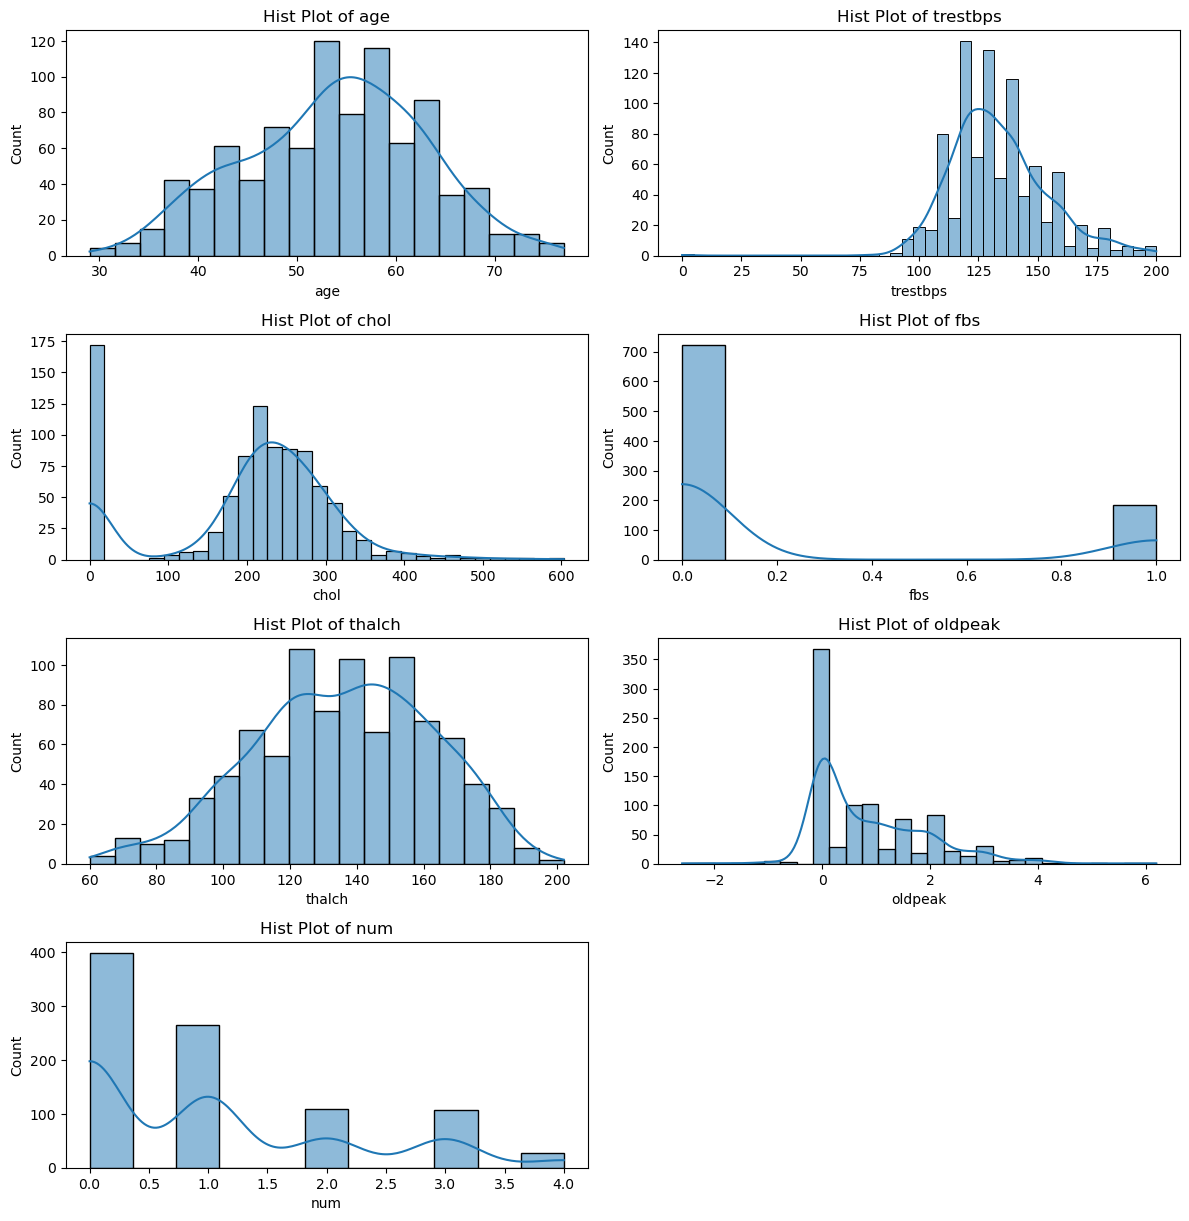

In [21]:
plt.figure(figsize=(12,len(numerical_cols)*3))
for i,fe in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols),2,i)
    sns.histplot(data=df, x=fe,kde=True,palette='viridis')  # Define the palette
    plt.title(f'Hist Plot of {fe}')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

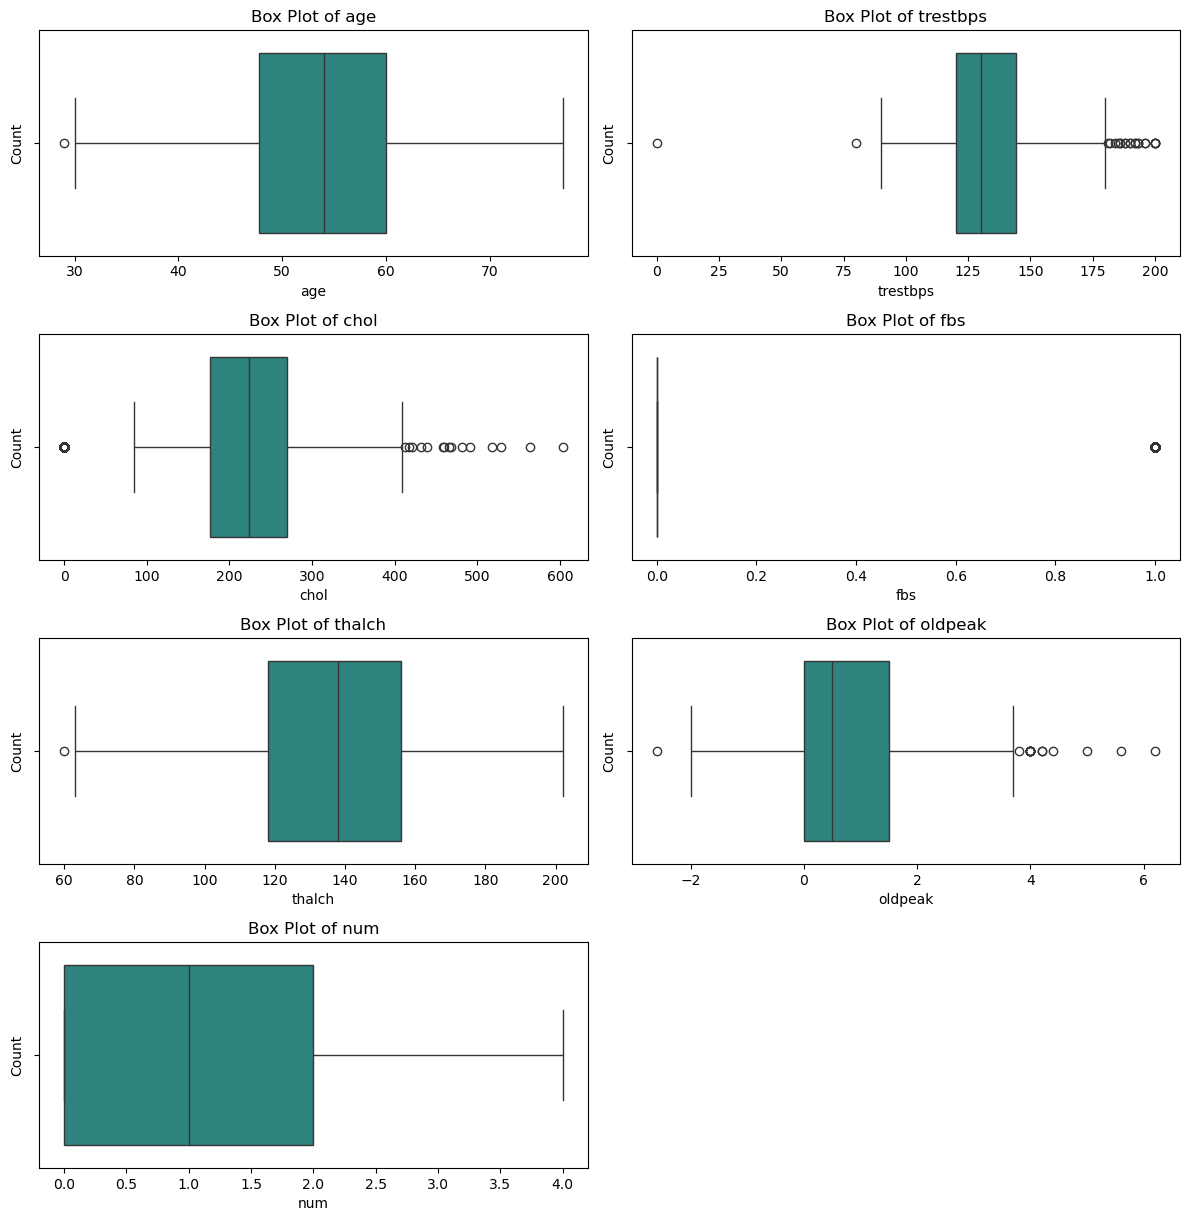

In [22]:
plt.figure(figsize=(12,len(numerical_cols)*3))
for i,fe in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols),2,i)
    sns.boxplot(data=df, x=fe,palette='viridis')  # Define the palette
    plt.title(f'Box Plot of {fe}')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Removing Outliers

In [24]:
from scipy import stats

def remove_outliers_z_score(df, columns, threshold=2.5):
    for column in columns:
        z_scores = stats.zscore(df[column])
        df = df[(abs(z_scores) < threshold)]
    
    return df
df=remove_outliers_z_score(df,numerical_cols)

In [25]:
df.shape

(830, 13)

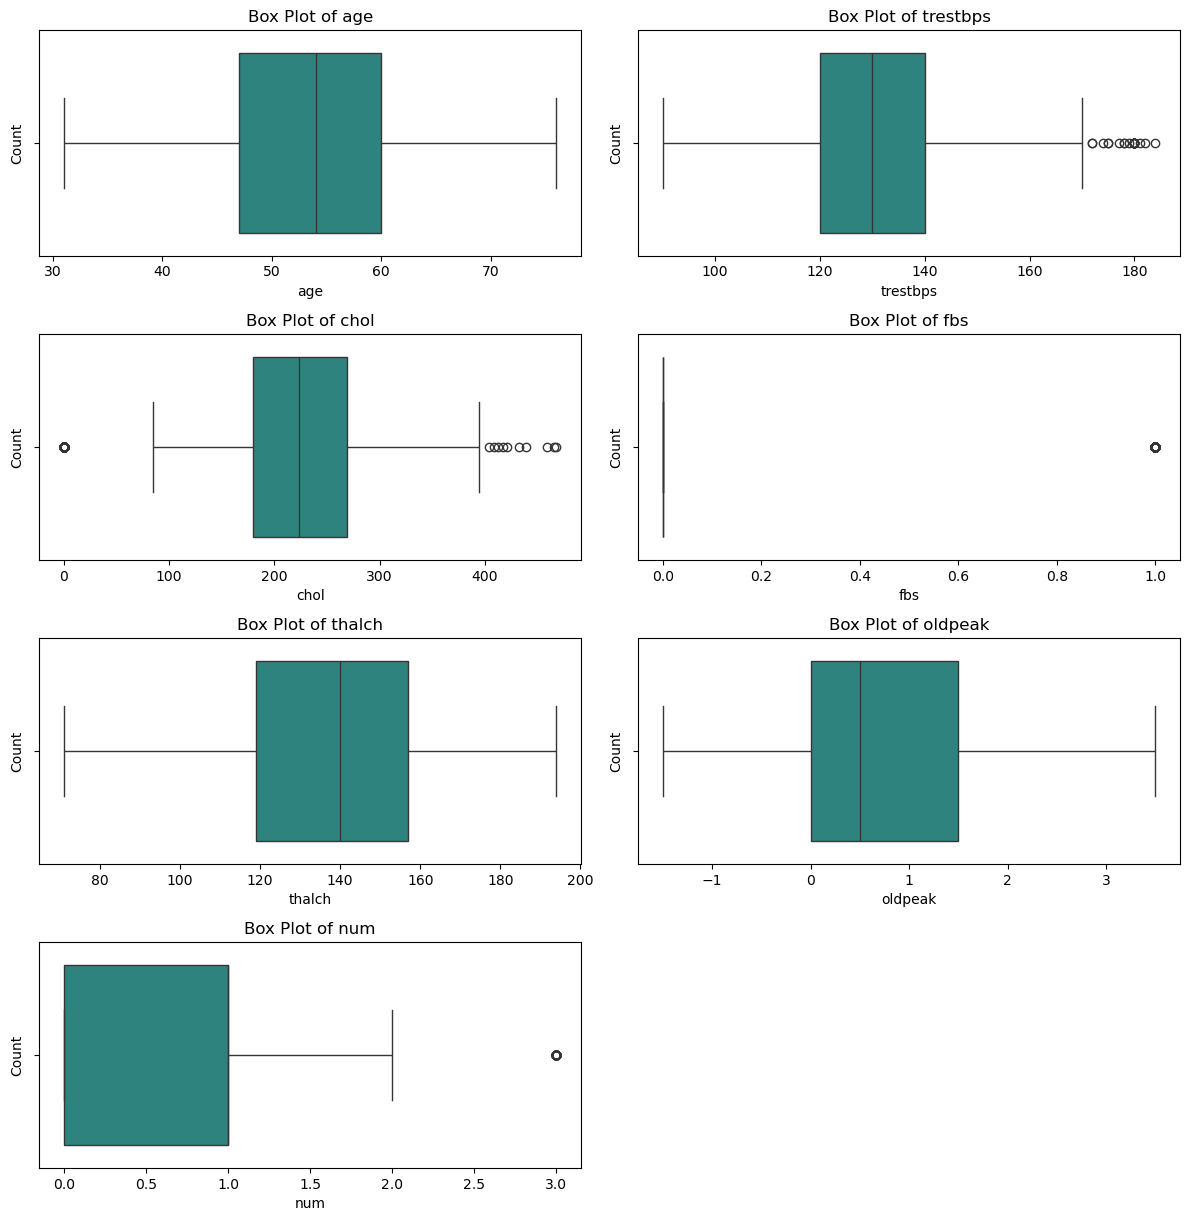

In [26]:
plt.figure(figsize=(12,len(numerical_cols)*3))
for i,fe in enumerate(numerical_cols,1):
    plt.subplot(len(numerical_cols),2,i)
    sns.boxplot(data=df, x=fe,palette='viridis')  # Define the palette
    plt.title(f'Box Plot of {fe}')
    plt.xlabel(fe)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [27]:
df.describe()

,age,trestbps,chol,fbs,thalch,oldpeak,num
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.00000
mean,53.491566,132.126506,201.163855,0.200000,137.139759,0.781084,0.86747
std,9.045752,18.205360,107.678428,0.400241,25.822017,0.926577,0.99663
min,31.000000,90.000000,0.000000,0.000000,71.000000,-1.500000,0.00000
25%,47.000000,120.000000,180.000000,0.000000,119.000000,0.000000,0.00000
50%,54.000000,130.000000,223.500000,0.000000,140.000000,0.500000,1.00000
75%,60.000000,140.000000,269.000000,0.000000,157.000000,1.500000,1.00000
max,76.000000,184.000000,468.000000,1.000000,194.000000,3.500000,3.00000


<Axes: >

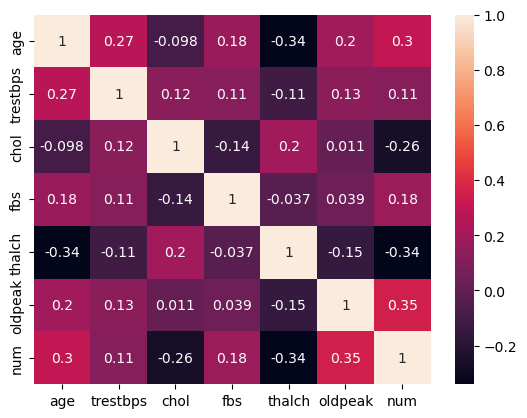

In [28]:
sns.heatmap(df[numerical_cols].corr(),annot=True,robust=True)

# Feature Engineering

In [30]:
X = df.drop('num',axis=1)
y = df['num']

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
lab = LabelEncoder()

In [33]:
for i in categorical_cols:
    X[i] = lab.fit_transform(X[i])

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
numerical_cols = [fe for fe in X.columns if fe not in ['object','bool']]

In [37]:
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dtc = DecisionTreeClassifier()

In [43]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred = dtc.predict(X_test)

In [45]:
y_pred_train=dtc.predict(X_train)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
print(f' acuracy score of train {accuracy_score(y_train,y_pred_train)}')
print(f' acuracy score of test {accuracy_score(y_test,y_pred)}')

 acuracy score of train 1.0
 acuracy score of test 0.5301204819277109


In [48]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_auc_score

In [49]:
print (confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[55 13  5  3]
 [14 25  8  2]
 [ 2 10  5  4]
 [ 4  6  7  3]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73        76
           1       0.46      0.51      0.49        49
           2       0.20      0.24      0.22        21
           3       0.25      0.15      0.19        20

    accuracy                           0.53       166
   macro avg       0.41      0.41      0.40       166
weighted avg       0.53      0.53      0.53       166



# Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid={
       'criterion':["gini", "entropy", "log_loss"],
        'splitter':["best", "random"],
        'max_depth':[3,4,5,6,7,9,15,16],
         'min_samples_split':[3,4,5,11,22,12,30,31]
}

In [53]:
grid=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,refit=True,cv=3,verbose=5)

In [54]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=3, splitter=best;, score=0.577 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=3, splitter=best;, score=0.575 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_split=3, splitter=best;, score=0.566 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=3, splitter=random;, score=0.563 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=3, splitter=random;, score=0.570 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, min_samples_split=3, splitter=random;, score=0.566 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, min_samples_split=4, splitter=best;, score=0.577 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, min_samples_split=4, splitter=best;, score=0.575 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, min_samp

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 9, 15, 16],
                         'min_samples_split': [3, 4, 5, 11, 22, 12, 30, 31],
                         'splitter': ['best', 'random']},
             verbose=5)

In [55]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 31,
 'splitter': 'random'}

In [56]:
y_pre=grid.predict(X_test)

In [57]:
print(f' acuracy score of test {accuracy_score(y_test,y_pre)}')

 acuracy score of test 0.5903614457831325


In [58]:
print (confusion_matrix(y_test,y_pre))
print(classification_report(y_test,y_pre))

[[67  9  0  0]
 [17 27  4  1]
 [ 5 15  0  1]
 [ 5 10  1  4]]
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        76
           1       0.44      0.55      0.49        49
           2       0.00      0.00      0.00        21
           3       0.67      0.20      0.31        20

    accuracy                           0.59       166
   macro avg       0.46      0.41      0.40       166
weighted avg       0.54      0.59      0.54       166



# Interview Questions

# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

# 2. What is the difference between the Label encoding and One-hot encoding?